# Adding images for training from a video

This notebook is similar to the previous one but the source of the images to label will be a video.

As an example here, we will generate the video from a camera and then work from the video.

In [14]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import ipywidgets as widgets
from ipyevents import Event 
import threading
from IPython.display import display

from unetTracker.trackingProject import TrackingProject
from unetTracker.multiClassUNetDataset import MultiClassUNetDataset
from unetTracker.camera import USBCamera, bgr8_to_jpeg
from unetTracker.unetGUI import LabelFromImagesGUI

Load a project

In [2]:
project = TrackingProject(name="faceTrack",root_folder = "/home/kevin/Documents/trackingProjects/")

Project directory: /home/kevin/Documents/trackingProjects/faceTrack
Loading /home/kevin/Documents/trackingProjects/faceTrack/config.yalm
{'augmentation_HorizontalFlipProb': 0.0, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_size': [480, 640], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'faceTrack', 'object_colors': [(0.0, 0.0, 255.0), (255.0, 0.0, 0.0), (255.0, 255.0, 0.0), (128.0, 0.0, 128.0)], 'objects': ['nose', 'chin', 'rEye', 'lEye'], 'target_radius': 10}


Create a dataset for the project.

In [3]:
dataset = MultiClassUNetDataset(image_dir=project.image_dir, mask_dir=project.mask_dir, coordinates_dir=project.coordinates_dir)

In [4]:
len(dataset)

480

### Creating a video as an example

In this notebook, we will label images from a video. 

Here we just use the camera to create a small video to work with.

If you already have your video, jump directly to the next section.

In [5]:
!ls -ltrh /dev/video*

crw-rw----+ 1 root video 81, 1 Nov 25 09:04 /dev/video1
crw-rw----+ 1 root video 81, 0 Nov 25 09:04 /dev/video0


Get a camera to create a video

In [6]:
camera = USBCamera(width=project.image_size[1], height=project.image_size[0])

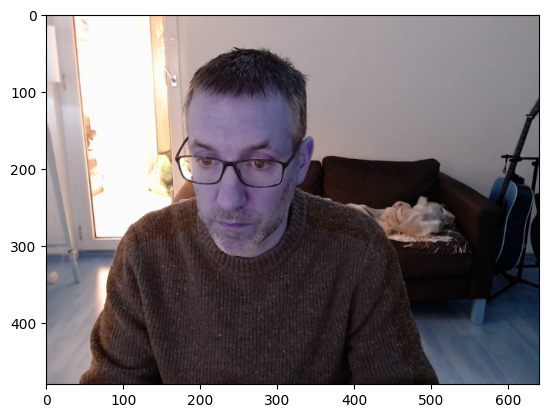

In [7]:
frame = camera.read()
plt.imshow(frame)

Save a video from the camera.

In [8]:
frame2save=30*10
video_fn = '/tmp/video1.avi'
size=project.image_size[1],project.image_size[0]
video = cv2.VideoWriter(video_fn, cv2.VideoWriter_fourcc(*'MJPG'),30, size)

# loop to save the video
for i in range(frame2save):
    frame = camera.read()
    video.write(frame)
    
video.release()

## Extract frames from a video

You need to select a directory in which the individual extracted frames will be saved. Here I used a directory within my project directory.

Images will be added to any image that is already in the folder. 

In [10]:
extracted_frame_dir = project.project_dir+"/extracted_frames/"
print(extracted_frame_dir)

/home/kevin/Documents/trackingProjects/faceTrack/extracted_frames/


In [11]:
dataset.extract_frames_from_video(video_fn,10,extracted_frame_dir)

Extracting frames: [ 61  64  93 124 140 200 250 257 266 292] to /home/kevin/Documents/trackingProjects/faceTrack/extracted_frames/


## Label extracted frames and save to dataset

We use a GUI to label the object in the extracted frames.

Make sure that your image is shown at maximal size by extending the notebook window. 
Make sure the label are correctly positioned in the image below.


1. In the large image, click on the object selected by the radio button. The label should appear in the picture below. 
2. If you don't want to save the data from a particular image, click on Next frame.
2. Repeat for all your visible objects
3. Click on Save labelled frame.
4. Repeat for all your images

When you click on `Save labelled frame`, the image is remove from the `extract_frame_dir` directory and transfer to your dataset.

In [15]:
LabelFromImagesGUI(image_dir=extracted_frame_dir,project=project,dataset=dataset)

In [16]:
len(dataset)

490